# Deskripsi Proyek : Bank Customer Churn
Nasabah Bank Beta pergi meninggalkan perusahaan: sedikit demi sedikit, jumlah mereka berkurang setiap bulannya. Para pegawai bank menyadari bahwa lebih murah untuk mempertahankan nasabah lama mereka yang setia daripada menarik nasabah baru.

**Instruksi Proyek**
- Mengunduh dan menyiapkan datanya. serta menjelaskan prosedurnya.
- Memeriksa keseimbangan kelas-kelas yang ada. melatih model tanpa mempertimbangkan ketidakseimbangan. serta menjelaskan temuan secara singkat.
- Meningkatkan kualitas model. Pastikan menggunakan setidaknya 2 pendekatan untuk memperbaiki ketidakseimbangan kelas. Gunakan training set untuk memilih parameter terbaik. kemudian melatih model yang berbeda pada training dan validation set. serta temukan model yang terbaik dan menjelaskan temuan secara singkat.
- Melakukan pengujian akhir.

**Tujuan Proyek**

Pada kasus ini, tugasnya adalah untuk memprediksi apakah seorang nasabah akan segera meninggalkan bank atau tidak. 
Pada data ini dapat terlihat perilaku para klien di masa lalu dan riwayat pemutusan kontrak mereka dengan bank.

- Membuat sebuah model dengan skor F1 semaksimal mungkin. 
- Memerlukan skor F1 minimal 0,59 untuk test dataset. Memeriksa nilai F1 untuk test set.
- Selain itu, mengukur metrik AUC-ROC dan bandingkan metrik tersebut dengan skor F1.

**Fitur-fitur dari data ini**
* `RowNumber` — indeks string data
* `CustomerId` — ID pelanggan
* `Surname` — nama belakang
* `CreditScore` — skor kredit
* `Geography` — negara domisili
* `Gender` — gender
* `Age` — umur
* `Tenure` — jangka waktu jatuh tempo untuk deposito tetap nasabah (tahun)
* `Balance` — saldo rekening
* `NumOfProducts` — jumlah produk bank yang digunakan oleh nasabah
* `HasCrCard` — apakah nasabah memiliki kartu kredit
* `IsActiveMember` — tingkat keaktifan nasabah
* `EstimatedSalary` — estimasi gaji

**Target**
* `Exited` — apakah nasabah telah berhenti

## Instruksi Proyek
### Langkah 1 
Unduh dan siapkan datanya. Jelaskan prosedurnya.

In [1]:
# memuat semua library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import levene

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',100)

In [2]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.dummy import DummyClassifier

In [3]:
# membaca berkas dan menyimpannya ke df
df_churn = pd.read_csv('/datasets/Churn.csv')

#### 1.1 Menyiapkan data

In [4]:
# memperoleh baris pertama
display(df_churn.head(), df_churn.tail())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


**Deskripsi Data**
- Data yang Anda butuhkan bisa ditemukan di file /datasets/Churn.csv. Unduh dataset.

**Fitur-fitur**
* `RowNumber` — indeks string data
* `CustomerId` — ID pelanggan
* `Surname` — nama belakang
* `CreditScore` — skor kredit
* `Geography` — negara domisili
* `Gender` — gender
* `Age` — umur
* `Tenure` — jangka waktu jatuh tempo untuk deposito tetap nasabah (tahun)
* `Balance` — saldo rekening
* `NumOfProducts` — jumlah produk bank yang digunakan oleh nasabah
* `HasCrCard` — apakah nasabah memiliki kartu kredit
* `IsActiveMember` — tingkat keaktifan nasabah
* `EstimatedSalary` — estimasi gaji

**Target**
* `Exited` — apakah nasabah telah berhenti

In [5]:
# memperoleh informasi umum tentang data di df
df_churn.info()
df_churn.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# ganti nama kolom (jadikan semua huruf kecil).
df_churn.columns = map(str.lower, df_churn.columns)
df_churn.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [7]:
# menghitung nilai yang hilang
df_churn.isna().sum()

rownumber            0
customerid           0
surname              0
creditscore          0
geography            0
gender               0
age                  0
tenure             909
balance              0
numofproducts        0
hascrcard            0
isactivemember       0
estimatedsalary      0
exited               0
dtype: int64

In [8]:
# menghitung jumlah baris/kolom dan nilai yang terduplikat
display(df_churn.shape, df_churn.duplicated().sum())

(10000, 14)

0

**Kesimpulan:**
- Dataset berjumlah 10000 baris dan 14 kolom
- Terdapat missing value pada kolom `Tenure` sejumlah 909.
- Tipe data dari semua kolom sudah sesuai.
- Mengganti nama kolom menjadi huruf kecil agar mempermudah analisa.

In [9]:
# menghapus 3 kolom yang tidak diperlukan
df_churn = df_churn.drop(['rownumber','customerid','surname'], axis=1)

In [10]:
# mengecek nilai yang hilang pada kolom 'Tenure'
df_churn['tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

**Kesimpulan:**
- Menghapus 3 kolom: `rownumber`, `customerid`, `surname` yang tidak diperlukan dalam proses selanjutnya.
- Mengecek kolom `tenure` yang memiliki nilai NaN. Perlu diidentifikasi apakah kolom ini akan berdampak pada prediksi nilai dan melihat apakah nilai NaN tersebut dapat diganti.

In [11]:
df_churn1 = df_churn[df_churn.isna().any(axis=1)]
print(df_churn1.shape)
display(df_churn1.pivot_table(index=['exited','geography','creditscore','gender'],values='balance',aggfunc=['mean','count']))

(909, 11)


mean   count
                                       balance balance
exited geography creditscore gender                   
0      France    413         Male         0.00       1
                 428         Female       0.00       1
                 435         Male         0.00       1
                 438         Female       0.00       1
                 444         Male         0.00       1
...                                        ...     ...
1      Spain     738         Male         0.00       1
                 785         Female  129855.72       1
                 790         Male    182364.53       1
                 828         Male    109876.82       1
                 850         Male    103007.47       2

[760 rows x 2 columns]

In [12]:
valueFrance = df_churn[df_churn['geography']=='France']['tenure'].median()
valueSpain =  df_churn[df_churn['geography']=='Spain']['tenure'].median()
print(valueFrance, valueSpain)

5.0 5.0


In [13]:
df_churn['tenure'].fillna(df_churn['tenure'].median(),inplace=True)
df_churn['tenure'].isna().sum()

0

**Kesimpulan:**
- Mengganti nilai null di kolom `tenure` dengan nilai median.
- Tenure yang bernilai NaN terdapat pada nasabah di negara: Prancis, Spanyol.
- Menghitung median `tenure` untuk masing-masing negara tersebut, hasilnya adalah 5.
- Mengganti nilai NaN dengan nilai median yaitu 5.

#### 1.2 Analisis data (EDA)

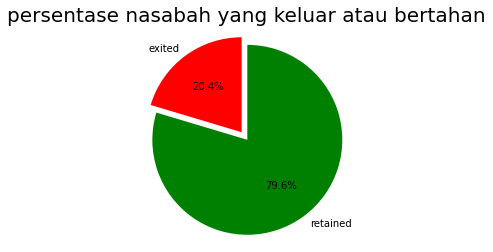

In [14]:
# Pie chart untuk menampilkan jumlah (persentase) nasabah yang keluar atau bertahan

labels = ['exited', 'retained']
sizes = [df_churn.exited[df_churn['exited'] == 1].count(), df_churn.exited[df_churn['exited'] == 0].count()]
explode = [0.1, 0]

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90, radius=1, colors=['r', 'g'], )
plt.title("persentase nasabah yang keluar atau bertahan", size = 20)
plt.axis('equal')
plt.show()

<AxesSubplot:>

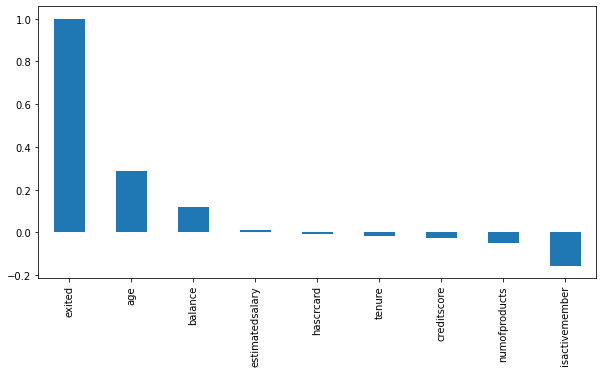

In [15]:
plt.figure(figsize=(10,5))
df_churn.corr()['exited'].sort_values(ascending = False).plot(kind='bar')

**Kesimpulan:**
- Dari data yang diberikan, terlihat bahwa sekitar 20% orang telah keluar atau churn. Jadi, kita bisa mencoba membuat model pembelajaran mesin yang bisa memprediksi apakah nasabah akan keluar dari bank atau bertahan dengan data perbankan mereka.
- Dilihat pada grafik di atas, kolom `age`,`balance`,`isactivemember`,`numofproducts` sepertinya memiliki korelasi yang tinggi dengan churn (keluarnya nasabah).

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Inisiatif yang bagus untuk memeriksa korelasi tiap kolom dengan target kolom. Pada proyek sesungguhnya, kamu perlu membagi dataset menjadi training-validation-test terlebih dahulu dan semua analisis (termasuk analisis korelasi) hanya boleh dilakukan pada training set, karena validation dan test diibaratkan merupakan data yang tidak pernah kamu lihat pada saat modeling (atau sering disebut sebagai *holdout set*)
</div>

#### 1.3 Feature Engineering

In [16]:
# menentukan kolom OHE

df_ohe = pd.get_dummies(df_churn,drop_first=True)
print(df_ohe.shape)
display(df_ohe.head())

(10000, 12)


,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


**Kesimpulan:**
- Setelah dilakukan penentuan yang menjadi kolom OHE adalah kolom `geography` dan `gender`.
- Kedua kolom tersebut (kolom `geography` dan `gender`) merupakan kolom kategori.

#### 1.4 Menetapkan dataset Training, Validation, dan Test

In [17]:
# mengatur dataset training, validation, dan test (features dan target)
target = df_ohe['exited']
features = df_ohe.drop(['exited'] , axis=1)

# membagi dataset menjadi training (60%) dan valid test (40%)
features_train, features_validtest, target_train, target_validtest = train_test_split(
    features, target, test_size=0.40, random_state=12345)

# membagi valid test menjadi validation dan test (masing-masing 20%)
features_test, features_valid, target_test, target_valid = train_test_split(
    features_validtest, target_validtest, test_size=0.50, random_state=12345)

totsize = len(df_ohe)
print('training set  : {0:.0%}'.format(len(features_train)/totsize),features_train.shape,', training target   :',target_train.shape)
print('validation set: {0:.0%}'.format(len(features_valid)/totsize),features_valid.shape,', validation target :',target_valid.shape)
print('test set      : {0:.0%}'.format(len(features_test)/totsize),features_test.shape,', test target       :',target_test.shape)

training set  : 60% (6000, 11) , training target   : (6000,)
validation set: 20% (2000, 11) , validation target : (2000,)
test set      : 20% (2000, 11) , test target       : (2000,)


**Kesimpulan:**
Pembagian dataset: Training set 60%, Validation dan Test set masing-masing 20%.

In [18]:
# standarisasi fitur numerical

numeric = ['creditscore','age','tenure','balance','numofproducts','estimatedsalary']
scaler = StandardScaler()

# transform train set
scaler.fit(features_train[numeric])
features_train.loc[:,numeric] = scaler.transform(features_train[numeric])

# transform validation set
features_valid.loc[:,numeric] = scaler.transform(features_valid[numeric])

# transform test set
features_test.loc[:,numeric] = scaler.transform(features_test[numeric])

print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

display('Training Set',features_train.head(), 'Validation Set',features_valid.head(),'Test Set',features_test.head())

(6000, 11)
(2000, 11)
(2000, 11)


'Training Set'

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
7479,-0.886751,-0.373192,1.082277,1.232271,-0.891560,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.082277,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.737696,1.027098,0.830152,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.354288,-1.233163,0.830152,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-1.101690,1.140475,-0.891560,0,0,1.524268,1,0,0


'Validation Set'

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
7041,-2.226392,-0.088482,-1.101690,-1.233163,0.830152,1,0,0.647083,0,0,1
5709,-0.087120,0.006422,1.446272,-1.233163,-0.891560,1,0,-1.658410,0,0,0
7117,-0.917905,-0.752805,-0.009707,0.722307,-0.891560,1,1,-1.369334,0,1,1
7775,-0.253277,0.101325,1.810266,-1.233163,0.830152,1,0,0.075086,0,1,1
8735,0.785204,-0.847708,1.810266,0.615625,-0.891560,0,1,-1.070919,0,0,1


'Test Set'

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
8532,-0.699824,-0.373192,-1.101690,-1.233163,0.830152,1,0,-0.015173,0,0,0
5799,-0.284431,0.575842,-0.737696,-1.233163,-0.891560,1,1,1.471724,0,0,0
5511,0.151731,-0.657902,-1.829679,0.438711,-0.891560,1,0,-1.367107,1,0,1
7365,-0.876366,-0.278288,1.810266,1.239884,-0.891560,1,1,-0.786517,0,1,0
7367,-0.481743,0.291132,1.810266,-1.233163,0.830152,1,0,1.358533,0,1,1


### Langkah 2
Periksalah keseimbangan kelas-kelas yang ada. Latihlah model Anda tanpa mempertimbangkan ketidakseimbangan. Jelaskan penemuan Anda secara singkat.

In [19]:
# membuat data frame untuk menyimpan nama Model, hasil akurasi-skor akurasi, auc_roc, f1_score valid, test, f1 yang memenuhi atau melebihi skor F1 yang diperlukan

column_names = ["method", "hyperparameters", "accuracy_score","auc_roc","f1_valid","f1_test",'f1_required','above_f1_threshold?']
df_churn_results = pd.DataFrame(columns = column_names)

In [20]:
# membuat fungsi kualitas model parameter

df_churn_results = pd.DataFrame(columns = column_names)

f1_required = 0.59
def supervised_model(model,features_train,target_train,method,hyperparameter):
  
     model.fit(features_train, target_train)
     predicted_valid = model.predict(features_valid)
     f1_valid = f1_score(target_valid,predicted_valid)

     predicted_test = model.predict(features_test)
     f1_test = f1_score(target_test,predicted_test)
     auc_roc = roc_auc_score(target_test, predicted_test)
     acc = accuracy_score(target_test,predicted_test)

     above_threshold = np.where(f1_test > f1_required, True, False)
     result_row_str = [method,hyperparameter,acc,auc_roc,f1_valid,f1_test,f1_required,above_threshold]
     return result_row_str

In [21]:
# LogisticRegression (tanpa hyperparameter)

method = "LogisticRegression"
hyperparameter = "none"
model = LogisticRegression(solver ='liblinear', random_state=12345) 

result = supervised_model(model,features_train,target_train,method,hyperparameter)
rows = [pd.Series(result, index = column_names)]
df_churn_results = df_churn_results.append(rows,ignore_index=True).round(decimals=4)

df_churn_results

,method,hyperparameters,accuracy_score,auc_roc,f1_valid,f1_test,f1_required,above_f1_threshold?
0,LogisticRegression,none,0.802,0.5932,0.2748,0.3311,0.59,False


In [22]:
# DecisionTreeClassifier dengan hyperparameter: depth

prev_score=0
found_depth=0
for depth in range (1,10,1):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    scorer = f1_score(target_valid,predicted_valid)
    
    print("scoreR:",scorer,"Depth:",depth)
    if (scorer > prev_score):
        prev_score = scorer
        found_depth = depth
print('max_depth',found_depth)

method = "DecisionTreeClassifier"
hyperparameter = "depth: "+str(found_depth)
model = DecisionTreeClassifier(max_depth=found_depth,random_state=12345)

result = supervised_model(model,features_train,target_train,method,hyperparameter)
rows = [pd.Series(result, index = column_names)]
df_churn_results = df_churn_results.append(rows,ignore_index=True).round(decimals=4)

df_churn_results

scoreR: 0.0 Depth: 1
scoreR: 0.4986301369863014 Depth: 2
scoreR: 0.3795620437956204 Depth: 3
scoreR: 0.48307692307692307 Depth: 4
scoreR: 0.5015772870662459 Depth: 5
scoreR: 0.5337423312883436 Depth: 6
scoreR: 0.4976816074188563 Depth: 7
scoreR: 0.48773006134969327 Depth: 8
scoreR: 0.5254470426409904 Depth: 9
max_depth 6


,method,hyperparameters,accuracy_score,auc_roc,f1_valid,f1_test,f1_required,above_f1_threshold?
0,LogisticRegression,none,0.802,0.5932,0.2748,0.3311,0.59,False
1,DecisionTreeClassifier,depth: 6,0.858,0.7078,0.5337,0.5697,0.59,False


In [23]:
# DecisionTreeClassifier dengan hyperparameters: balanced weights,depth

prev_score=0
found_depth=0
for depth in range (1,10,1):
    model = DecisionTreeClassifier(max_depth=depth,random_state=12345,class_weight='balanced')
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    scorer = f1_score(target_valid,predicted_valid)
    
    print("scoreR:",scorer,"Depth:",depth)
    if (scorer > prev_score):
        prev_score = scorer
        found_depth = depth
print('maxDepth',found_depth)

method = "DecisionTreeClassifier"
hyperparameter = "Balanced, depth: "+str(found_depth)
model = DecisionTreeClassifier(max_depth=found_depth,class_weight='balanced',random_state=12345)

result = supervised_model(model,features_train,target_train,method,hyperparameter)
rows = [pd.Series(result, index = column_names)]
df_churn_results = df_churn_results.append(rows,ignore_index=True).round(decimals=4)

df_churn_results

scoreR: 0.48514851485148514 Depth: 1
scoreR: 0.5129682997118156 Depth: 2
scoreR: 0.5129682997118156 Depth: 3
scoreR: 0.5385239253852393 Depth: 4
scoreR: 0.5809128630705395 Depth: 5
scoreR: 0.5643835616438356 Depth: 6
scoreR: 0.5593869731800767 Depth: 7
scoreR: 0.5466417910447762 Depth: 8
scoreR: 0.5440464666021297 Depth: 9
maxDepth 5


,method,hyperparameters,accuracy_score,auc_roc,f1_valid,f1_test,f1_required,above_f1_threshold?
0,LogisticRegression,none,0.8020,0.5932,0.2748,0.3311,0.59,False
1,DecisionTreeClassifier,depth: 6,0.8580,0.7078,0.5337,0.5697,0.59,False
2,DecisionTreeClassifier,"Balanced, depth: 5",0.8105,0.7588,0.5809,0.5964,0.59,True


In [24]:
# LogisticRegression dengan hyperparameters: balanced weights

model = LogisticRegression(solver='liblinear',class_weight='balanced',random_state=12345)
method = "LogisticRegression"
hyperparameter = "Balanced"

result = supervised_model(model,features_train,target_train,method,hyperparameter)
rows = [pd.Series(result, index = column_names)]
df_churn_results = df_churn_results.append(rows,ignore_index=True).round(decimals=4)

df_churn_results

,method,hyperparameters,accuracy_score,auc_roc,f1_valid,f1_test,f1_required,above_f1_threshold?
0,LogisticRegression,none,0.8020,0.5932,0.2748,0.3311,0.59,False
1,DecisionTreeClassifier,depth: 6,0.8580,0.7078,0.5337,0.5697,0.59,False
2,DecisionTreeClassifier,"Balanced, depth: 5",0.8105,0.7588,0.5809,0.5964,0.59,True
3,LogisticRegression,Balanced,0.7020,0.6946,0.4788,0.4889,0.59,False


In [25]:
# RandomForest dengan hyperparameters: n_estimators, depth, balanced weights

prev_score=0.0
found_depth=0
for depth in range(1,10,1):
    model = RandomForestClassifier(n_estimators=20,max_depth=depth,random_state=12345,class_weight='balanced')
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1_scr = f1_score(target_valid,predicted_valid)
    print("f1Score:",f1_scr,"Depth:",depth)
    if (f1_scr > prev_score):
        prev_score = f1_scr
        found_depth = depth
print('maxDepth',found_depth)

model = RandomForestClassifier(n_estimators=100, max_depth=found_depth,random_state=12345,class_weight='balanced')
method = "RandomForestClassifier"
hyperparameter = "Balanced, depth: "+str(found_depth)

result = supervised_model(model,features_train,target_train,method,hyperparameter)
rows = [pd.Series(result, index = column_names)]
df_churn_results = df_churn_results.append(rows,ignore_index=True).round(decimals=4)

df_churn_results

f1Score: 0.5306122448979591 Depth: 1
f1Score: 0.558766859344894 Depth: 2
f1Score: 0.5532302092811647 Depth: 3
f1Score: 0.5682951146560319 Depth: 4
f1Score: 0.5893037336024217 Depth: 5
f1Score: 0.5813492063492063 Depth: 6
f1Score: 0.6010471204188481 Depth: 7
f1Score: 0.591703056768559 Depth: 8
f1Score: 0.5958904109589042 Depth: 9
maxDepth 7


,method,hyperparameters,accuracy_score,auc_roc,f1_valid,f1_test,f1_required,above_f1_threshold?
0,LogisticRegression,none,0.8020,0.5932,0.2748,0.3311,0.59,False
1,DecisionTreeClassifier,depth: 6,0.8580,0.7078,0.5337,0.5697,0.59,False
2,DecisionTreeClassifier,"Balanced, depth: 5",0.8105,0.7588,0.5809,0.5964,0.59,True
3,LogisticRegression,Balanced,0.7020,0.6946,0.4788,0.4889,0.59,False
4,RandomForestClassifier,"Balanced, depth: 7",0.8195,0.7768,0.6198,0.6196,0.59,True


In [26]:
# confusion matrix

predicted_test = model.predict(features_test)
confusion_matrix = confusion_matrix(target_test,predicted_test)
print(confusion_matrix)

[[1345  237]
 [ 124  294]]


**Kesimpulan:**
- Confusion Matriks menampilkan DecisionTreeClassifier memberikan terlalu banyak FN (False Negative). Menunjukkan bahwa data memiliki banyak TN (True Negative) yang memperlihatkan terlalu banyak nilai TIDAK (nasabah tidak meninggalkan bank).
- Masalahnya adalah ketidakseimbangan kelas. Oleh karena itu perlu memperbaiki ketidakseimbangan dalam data untuk meningkatkan kualitas model.

In [27]:
target_names = ['exited 0', 'exited 1'] 
print(classification_report(target_test,predicted_test,target_names=target_names))

              precision    recall  f1-score   support

    exited 0       0.92      0.85      0.88      1582
    exited 1       0.55      0.70      0.62       418

    accuracy                           0.82      2000
   macro avg       0.73      0.78      0.75      2000
weighted avg       0.84      0.82      0.83      2000



**Kesimpulan:**
- Nilai exited=0 diprediksi dengan f1_score 79%, nilai exited=1 diprediksi dengan f1_score 21%
- Melakukan pengujian model dengan upsampling exited=1, dan downsampling exited=0

### Langkah 3
Tingkatkan kualitas model. Pastikan bahwa Anda menggunakan setidaknya dua pendekatan untuk memperbaiki ketidakseimbangan kelas. Gunakan training set untuk memilih parameter terbaik. Latihlah model yang berbeda pada training dan validation set. Temukan model yang terbaik. Jelaskan penemuan Anda secara singkat.

In [28]:
# UpSampling, DownSampling

features_zeros = features_train[target_train==0]
features_ones = features_train[target_train==1]
target_zeros = target_train[target_train==0]
target_ones = target_train[target_train==1]
print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(4804, 11)
(1196, 11)
(4804,)
(1196,)


**Kesimpulan:**
- Observasi positif lebih sedikit daripada observasi negatif.
- Lebih sedikit nasabah yang keluar.
- Perlu dilakukan Upsampling

#### 3.1 Upsampling

In [29]:
# membuat Upsampling

repeat = 2
features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
print(features_upsampled.shape)
print(target_upsampled.shape)
features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)

(7196, 11)
(7196,)


In [30]:
# menguji jumlah upsample

features_zeros = features_upsampled[target_train==0]
features_ones = features_upsampled[target_train==1]
target_zeros = target_upsampled[target_train==0]
target_ones = target_upsampled[target_train==1]
print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(4804, 11)
(2392, 11)
(4804,)
(2392,)


#### 3.2 Downsampling

In [31]:
# mencoba Downsampling

print(features_train.shape)
fraction=0.8
features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
target_downsampled = pd.concat(
    [target_zeros.sample(frac=fraction,random_state=12345)] + [target_ones])
features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)

print(features_downsampled.shape,target_downsampled.shape)

(6000, 11)
(6235, 11) (6235,)


In [32]:
# menguji jumlah downsample

features_zeros = features_downsampled[target_train==0]
features_ones = features_downsampled[target_train==1]
target_zeros = target_downsampled[target_train==0]
target_ones = target_downsampled[target_train==1]
print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(3843, 11)
(2392, 11)
(3843,)
(2392,)


**Kesimpulan:**
- Dataset training: membuat Upsample dan Downsample. Menguji dengan berbagai nilai repeat, frac. 
- Yang ditunjukkan di atas adalah yang memiliki f1_scores terbaik

### Langkah 4
Jalankan pengujian terakhir.

#### 4.1 Menguji model dengan Upsampling

In [33]:
# mengevaluasi model dengan Upsampling, Downsampling
# melatih model LogisticRegression dengan upsample

method="LogisticRegression"
hyperparameter="Balanced, upsampled"
model = LogisticRegression(solver='liblinear',class_weight='balanced',random_state=12345)

result = supervised_model(model,features_upsampled,target_upsampled,method,hyperparameter)
rows = [pd.Series(result, index = column_names)]
df_churn_results = df_churn_results.append(rows,ignore_index=True).round(decimals=4)

df_churn_results

,method,hyperparameters,accuracy_score,auc_roc,f1_valid,f1_test,f1_required,above_f1_threshold?
0,LogisticRegression,none,0.8020,0.5932,0.2748,0.3311,0.59,False
1,DecisionTreeClassifier,depth: 6,0.8580,0.7078,0.5337,0.5697,0.59,False
2,DecisionTreeClassifier,"Balanced, depth: 5",0.8105,0.7588,0.5809,0.5964,0.59,True
3,LogisticRegression,Balanced,0.7020,0.6946,0.4788,0.4889,0.59,False
4,RandomForestClassifier,"Balanced, depth: 7",0.8195,0.7768,0.6198,0.6196,0.59,True
5,LogisticRegression,"Balanced, upsampled",0.7020,0.6946,0.4788,0.4889,0.59,False


In [34]:
# DecisionTree dengan upsample, Hyperparameter: depth, balanced weights

prev_score=0
found_depth=0
for depth in range(1,10,1):
    model = DecisionTreeClassifier(max_depth=depth,random_state=12345,class_weight='balanced')
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    scorer = f1_score(target_valid,predicted_valid)
    
    print("scoreR:",scorer,"Depth:",depth)
    if (scorer > prev_score):
        prev_score = scorer
        found_depth = depth
print('maxDepth',found_depth)

method="DecisionTreeClassifier"
hyperparameter = "Balanced, upsampled, depth: "+str(found_depth)
model = DecisionTreeClassifier(max_depth=found_depth,class_weight='balanced',random_state=12345)

result = supervised_model(model,features_upsampled,target_upsampled,method,hyperparameter)
rows = [pd.Series(result, index = column_names)]
df_churn_results = df_churn_results.append(rows,ignore_index=True).round(decimals=4)

df_churn_results

scoreR: 0.48514851485148514 Depth: 1
scoreR: 0.5129682997118156 Depth: 2
scoreR: 0.5129682997118156 Depth: 3
scoreR: 0.5385239253852393 Depth: 4
scoreR: 0.5809128630705395 Depth: 5
scoreR: 0.5648994515539306 Depth: 6
scoreR: 0.5607655502392344 Depth: 7
scoreR: 0.5476635514018692 Depth: 8
scoreR: 0.5472061657032755 Depth: 9
maxDepth 5


,method,hyperparameters,accuracy_score,auc_roc,f1_valid,f1_test,f1_required,above_f1_threshold?
0,LogisticRegression,none,0.8020,0.5932,0.2748,0.3311,0.59,False
1,DecisionTreeClassifier,depth: 6,0.8580,0.7078,0.5337,0.5697,0.59,False
2,DecisionTreeClassifier,"Balanced, depth: 5",0.8105,0.7588,0.5809,0.5964,0.59,True
3,LogisticRegression,Balanced,0.7020,0.6946,0.4788,0.4889,0.59,False
4,RandomForestClassifier,"Balanced, depth: 7",0.8195,0.7768,0.6198,0.6196,0.59,True
5,LogisticRegression,"Balanced, upsampled",0.7020,0.6946,0.4788,0.4889,0.59,False
6,DecisionTreeClassifier,"Balanced, upsampled, depth: 5",0.8105,0.7588,0.5809,0.5964,0.59,True


In [35]:
# RandomForest dengan upsample, Hyperparameter: n_estimators, depth, balanced weights

prev_score=0.0
found_depth=0
for depth in range(1,10,1):
    model = RandomForestClassifier(n_estimators=20,max_depth=depth,random_state=12345,class_weight='balanced')
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    f1_scr = f1_score(target_valid,predicted_valid)
    print("f1Score:",f1_scr,"Depth:",depth)
    if (f1_scr > prev_score):
        prev_score = f1_scr
        found_depth = depth
print('maxDepth',found_depth,"f1Score:",f1_scr)

model = RandomForestClassifier(n_estimators=100, max_depth=found_depth,random_state=12345,class_weight='balanced')
method = "RandomForestClassifier"
hyperparameter = "Balanced,upsampled, depth: "+str(found_depth)

result = supervised_model(model,features_upsampled,target_upsampled,method,hyperparameter)
rows = [pd.Series(result, index = column_names)]
df_churn_results = df_churn_results.append(rows,ignore_index=True).round(decimals=4)

df_churn_results

f1Score: 0.5324298160697 Depth: 1
f1Score: 0.5503116651825468 Depth: 2
f1Score: 0.5672461116193962 Depth: 3
f1Score: 0.584070796460177 Depth: 4
f1Score: 0.5878848063555114 Depth: 5
f1Score: 0.5919370698131761 Depth: 6
f1Score: 0.606425702811245 Depth: 7
f1Score: 0.6036960985626283 Depth: 8
f1Score: 0.5923566878980892 Depth: 9
maxDepth 7 f1Score: 0.5923566878980892


,method,hyperparameters,accuracy_score,auc_roc,f1_valid,f1_test,f1_required,above_f1_threshold?
0,LogisticRegression,none,0.8020,0.5932,0.2748,0.3311,0.59,False
1,DecisionTreeClassifier,depth: 6,0.8580,0.7078,0.5337,0.5697,0.59,False
2,DecisionTreeClassifier,"Balanced, depth: 5",0.8105,0.7588,0.5809,0.5964,0.59,True
3,LogisticRegression,Balanced,0.7020,0.6946,0.4788,0.4889,0.59,False
4,RandomForestClassifier,"Balanced, depth: 7",0.8195,0.7768,0.6198,0.6196,0.59,True
5,LogisticRegression,"Balanced, upsampled",0.7020,0.6946,0.4788,0.4889,0.59,False
6,DecisionTreeClassifier,"Balanced, upsampled, depth: 5",0.8105,0.7588,0.5809,0.5964,0.59,True
7,RandomForestClassifier,"Balanced,upsampled, depth: 7",0.8155,0.7795,0.6113,0.6192,0.59,True


#### 4.2 Menguji model dengan Downsampling

In [36]:
# LogisticRegression dengan downsample, Hyperparameter: balanced weights

method="LogisticRegression"
hyperparameter="Balanced, downsampled"

result = supervised_model(model,features_downsampled,target_downsampled,method,hyperparameter)
rows = [pd.Series(result, index = column_names)]
df_churn_results = df_churn_results.append(rows,ignore_index=True).round(decimals=4)

df_churn_results

,method,hyperparameters,accuracy_score,auc_roc,f1_valid,f1_test,f1_required,above_f1_threshold?
0,LogisticRegression,none,0.8020,0.5932,0.2748,0.3311,0.59,False
1,DecisionTreeClassifier,depth: 6,0.8580,0.7078,0.5337,0.5697,0.59,False
2,DecisionTreeClassifier,"Balanced, depth: 5",0.8105,0.7588,0.5809,0.5964,0.59,True
3,LogisticRegression,Balanced,0.7020,0.6946,0.4788,0.4889,0.59,False
4,RandomForestClassifier,"Balanced, depth: 7",0.8195,0.7768,0.6198,0.6196,0.59,True
5,LogisticRegression,"Balanced, upsampled",0.7020,0.6946,0.4788,0.4889,0.59,False
6,DecisionTreeClassifier,"Balanced, upsampled, depth: 5",0.8105,0.7588,0.5809,0.5964,0.59,True
7,RandomForestClassifier,"Balanced,upsampled, depth: 7",0.8155,0.7795,0.6113,0.6192,0.59,True
8,LogisticRegression,"Balanced, downsampled",0.8120,0.7791,0.6077,0.6163,0.59,True


In [37]:
# DecisionTree dengan downsample, Hyperparameter: depth, balanced weights

prev_score=0
found_depth=0
for depth in range(1,10,1):
    model = DecisionTreeClassifier(max_depth=depth,random_state=12345,class_weight='balanced')
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    scorer = f1_score(target_valid,predicted_valid)
    
    print("scoreR:",scorer,"Depth:",depth)
    if (scorer > prev_score):
        prev_score = scorer
        found_depth = depth
print('maxDepth',found_depth)

method="DecisionTreeClassifier"
hyperparameter = "Balanced, downsampled, depth: "+str(found_depth)
model = DecisionTreeClassifier(max_depth=found_depth,class_weight='balanced',random_state=12345)

result = supervised_model(model,features_downsampled,target_downsampled,method,hyperparameter)
rows = [pd.Series(result, index = column_names)]
df_churn_results = df_churn_results.append(rows,ignore_index=True).round(decimals=4)

df_churn_results

scoreR: 0.48514851485148514 Depth: 1
scoreR: 0.5129682997118156 Depth: 2
scoreR: 0.5129682997118156 Depth: 3
scoreR: 0.5388349514563108 Depth: 4
scoreR: 0.5794979079497907 Depth: 5
scoreR: 0.558303886925795 Depth: 6
scoreR: 0.5509300265721877 Depth: 7
scoreR: 0.5512820512820512 Depth: 8
scoreR: 0.5450980392156862 Depth: 9
maxDepth 5


,method,hyperparameters,accuracy_score,auc_roc,f1_valid,f1_test,f1_required,above_f1_threshold?
0,LogisticRegression,none,0.8020,0.5932,0.2748,0.3311,0.59,False
1,DecisionTreeClassifier,depth: 6,0.8580,0.7078,0.5337,0.5697,0.59,False
2,DecisionTreeClassifier,"Balanced, depth: 5",0.8105,0.7588,0.5809,0.5964,0.59,True
3,LogisticRegression,Balanced,0.7020,0.6946,0.4788,0.4889,0.59,False
4,RandomForestClassifier,"Balanced, depth: 7",0.8195,0.7768,0.6198,0.6196,0.59,True
5,LogisticRegression,"Balanced, upsampled",0.7020,0.6946,0.4788,0.4889,0.59,False
6,DecisionTreeClassifier,"Balanced, upsampled, depth: 5",0.8105,0.7588,0.5809,0.5964,0.59,True
7,RandomForestClassifier,"Balanced,upsampled, depth: 7",0.8155,0.7795,0.6113,0.6192,0.59,True
8,LogisticRegression,"Balanced, downsampled",0.8120,0.7791,0.6077,0.6163,0.59,True
9,DecisionTreeClassifier,"Balanced, downsampled, depth: 5",0.8110,0.7591,0.5795,0.5970,0.59,True


In [38]:
# RandomForest dengan downsample, Hyperparameter: n_estimators, depth, balanced weights

prev_score=0.0
found_depth=0
for depth in range(1,10,1):
    model = RandomForestClassifier(n_estimators=20,max_depth=depth,random_state=12345,class_weight='balanced')
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    f1_scr = f1_score(target_valid,predicted_valid)
    print("f1Score:",f1_scr,"Depth:",depth)
    if (f1_scr > prev_score):
        prev_score = f1_scr
        found_depth = depth
print('maxDepth',found_depth)

model = RandomForestClassifier(n_estimators=100,max_depth=found_depth,random_state=12345,class_weight='balanced')
method = "RandomForestClassifier"
hyperparameter = "Balanced, downsampled, depth: "+str(found_depth)

result = supervised_model(model,features_downsampled,target_downsampled,method,hyperparameter)
rows = [pd.Series(result, index = column_names)]
df_churn_results = df_churn_results.append(rows,ignore_index=True).round(decimals=4)

df_churn_results

f1Score: 0.5237668161434978 Depth: 1
f1Score: 0.5481874447391689 Depth: 2
f1Score: 0.5567567567567567 Depth: 3
f1Score: 0.5823529411764705 Depth: 4
f1Score: 0.5752636625119846 Depth: 5
f1Score: 0.5882352941176471 Depth: 6
f1Score: 0.601593625498008 Depth: 7
f1Score: 0.5974025974025974 Depth: 8
f1Score: 0.5899893503727369 Depth: 9
maxDepth 7


,method,hyperparameters,accuracy_score,auc_roc,f1_valid,f1_test,f1_required,above_f1_threshold?
0,LogisticRegression,none,0.8020,0.5932,0.2748,0.3311,0.59,False
1,DecisionTreeClassifier,depth: 6,0.8580,0.7078,0.5337,0.5697,0.59,False
2,DecisionTreeClassifier,"Balanced, depth: 5",0.8105,0.7588,0.5809,0.5964,0.59,True
3,LogisticRegression,Balanced,0.7020,0.6946,0.4788,0.4889,0.59,False
4,RandomForestClassifier,"Balanced, depth: 7",0.8195,0.7768,0.6198,0.6196,0.59,True
5,LogisticRegression,"Balanced, upsampled",0.7020,0.6946,0.4788,0.4889,0.59,False
6,DecisionTreeClassifier,"Balanced, upsampled, depth: 5",0.8105,0.7588,0.5809,0.5964,0.59,True
7,RandomForestClassifier,"Balanced,upsampled, depth: 7",0.8155,0.7795,0.6113,0.6192,0.59,True
8,LogisticRegression,"Balanced, downsampled",0.8120,0.7791,0.6077,0.6163,0.59,True
9,DecisionTreeClassifier,"Balanced, downsampled, depth: 5",0.8110,0.7591,0.5795,0.5970,0.59,True


In [39]:
# mengurutkan semua pengklasifikasi berdasarkan f1_score pada test dataset

df_churn_results = df_churn_results.sort_values(by='f1_test',ascending=False)
df_churn_results

,method,hyperparameters,accuracy_score,auc_roc,f1_valid,f1_test,f1_required,above_f1_threshold?
4,RandomForestClassifier,"Balanced, depth: 7",0.8195,0.7768,0.6198,0.6196,0.59,True
7,RandomForestClassifier,"Balanced,upsampled, depth: 7",0.8155,0.7795,0.6113,0.6192,0.59,True
8,LogisticRegression,"Balanced, downsampled",0.8120,0.7791,0.6077,0.6163,0.59,True
10,RandomForestClassifier,"Balanced, downsampled, depth: 7",0.8120,0.7791,0.6077,0.6163,0.59,True
9,DecisionTreeClassifier,"Balanced, downsampled, depth: 5",0.8110,0.7591,0.5795,0.5970,0.59,True
2,DecisionTreeClassifier,"Balanced, depth: 5",0.8105,0.7588,0.5809,0.5964,0.59,True
6,DecisionTreeClassifier,"Balanced, upsampled, depth: 5",0.8105,0.7588,0.5809,0.5964,0.59,True
1,DecisionTreeClassifier,depth: 6,0.8580,0.7078,0.5337,0.5697,0.59,False
3,LogisticRegression,Balanced,0.7020,0.6946,0.4788,0.4889,0.59,False
5,LogisticRegression,"Balanced, upsampled",0.7020,0.6946,0.4788,0.4889,0.59,False


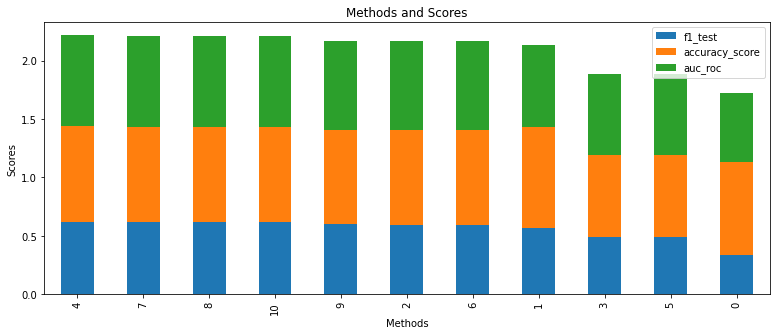

In [40]:
df_churn_results.plot(y=['f1_test','accuracy_score','auc_roc'],kind="bar",stacked=True,
                       figsize=(13,5)).legend(loc='best')
plt.title('Methods and Scores')
plt.xlabel('Methods')
plt.ylabel('Scores');

**Kesimpulan:**
- Dari tabel di atas, didapatkan pengklasifikasi (model) terbaik yaitu:
    * RandomForestClassifier dengan hyperparameter Balanced, depth: 7
    * f1_score-nya adalah 0.6196, akurasi_score: 0,81, auc_roc: 0.77

#### 4.3 Sanity Check

0    0.7963
1    0.2037
Name: exited, dtype: float64


<AxesSubplot:>

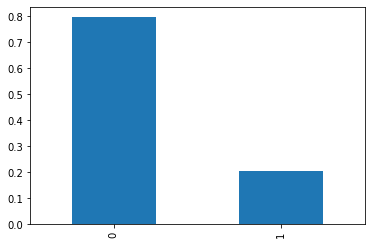

In [41]:
# Sanity Check pada keseluruhan dataset

class_frequency = df_churn['exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

In [42]:
target = df_churn['exited']
features = df_churn.drop('exited', axis=1)

target_pred_constant = pd.Series([1 for x in range(len(target))], index=target.index)
print('Akurasi untuk seluruh nasabah yang keluar',accuracy_score(target,target_pred_constant))

Akurasi untuk seluruh nasabah yang keluar 0.2037


In [43]:
# Sanity Check pada test dataset

stay_target = (target_test == 0)
exit_target = (target_test == 1)

print('Jumlah nasabah yang masih bertahan', stay_target.sum())
print('Jumlah nasabah yang keluar', exit_target.sum())
accuracy_check = stay_target.sum() / target_test.shape[0]
print('Akurasi pengklasifikasi nasabah yang bertahan', accuracy_check )
print('Akurasi pengklasifikasi nasabah yang keluar', exit_target.sum() / target_test.shape[0] )

Jumlah nasabah yang masih bertahan 1582
Jumlah nasabah yang keluar 418
Akurasi pengklasifikasi nasabah yang bertahan 0.791
Akurasi pengklasifikasi nasabah yang keluar 0.209


In [44]:
print(classification_report(target_test,predicted_test,target_names=target_names))

              precision    recall  f1-score   support

    exited 0       0.92      0.85      0.88      1582
    exited 1       0.55      0.70      0.62       418

    accuracy                           0.82      2000
   macro avg       0.73      0.78      0.75      2000
weighted avg       0.84      0.82      0.83      2000



**Kesimpulan:**
- Basis nasabah Churn (keluar) adalah 20% dari seluruh kumpulan data Test, dan 21% dari kumpulan data Test.
- Model yang digunakan memprediksi nasabah yang bertahan dengan f1_score 0,88 dan nasabah yang berhenti dengan f1_score 0,62.

### Kesimpulan Akhir:
- Dari analisa di atas, model pengklasifikasi terbaik yang didapatkan adalah:
    * RandomForestClassifier dengan hyperparameter Balanced, depth: 7
    * f1_score-nya adalah 0.6196, akurasi_score: 0,81, auc_roc: 0.77